# Validation

In [1]:
# general
import os
import numpy as np

# custom code
from zebrafish.configs import load_config
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")
    
assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

## Restore model

In [2]:
model_name = "2020_05_24_21_44_41"
threshold = 0.5
n_images = 1
path_to_model = "output/" + model_name


cfg = load_config(path_to_model)
register_datasets("dataset")

## Evaluate model

In [3]:
coco_evaluation(cfg, "test")

WARNING [05/25 21:27:42 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_direction'. Trying to convert it to COCO format ...
[05/25 21:27:42 d2.data.datasets.coco]: Cached annotations in COCO format already exist: /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_24_21_44_41/test_direction_coco_format.json
[05/25 21:27:43 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/25 21:27:43 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_24_21_44_41/coco_instances_results.json
[05/25 21:27:43 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.768
 

OrderedDict([('bbox',
              {'AP': 76.82662596616804,
               'AP50': 97.52475247524752,
               'AP75': 93.30136138613861,
               'APs': nan,
               'APm': 90.81683168316832,
               'APl': 75.27343582572543,
               'AP-N': 77.29844413012731,
               'AP-NE': 69.48844884488449,
               'AP-E': 81.34713471347135,
               'AP-SE': 83.86138613861385,
               'AP-S': 86.41584158415843,
               'AP-SW': 53.21605374823197,
               'AP-W': 85.46094609460945,
               'AP-NW': 77.52475247524752}),
             ('segm',
              {'AP': 68.55678871458575,
               'AP50': 95.08044554455446,
               'AP75': 82.2875412541254,
               'APs': nan,
               'APm': 79.93705799151343,
               'APl': 68.01505775577557,
               'AP-N': 73.17680339462518,
               'AP-NE': 66.30363036303632,
               'AP-E': 81.2037203720372,
               'AP-SE':

## Make predictions

In [4]:
dataset = "test"

images = load_all_image_in_dataset(dataset, cfg)[:1]
predictions = predict(cfg, images, threshold=threshold)

## Plot predictions

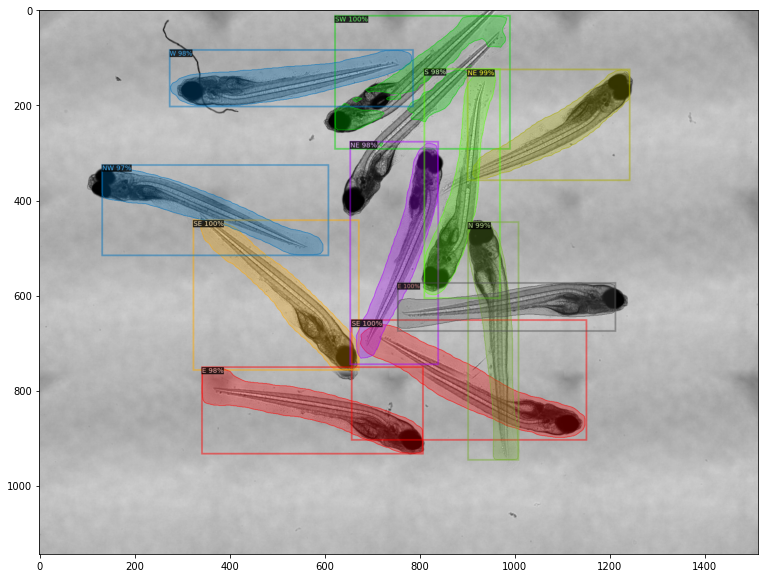

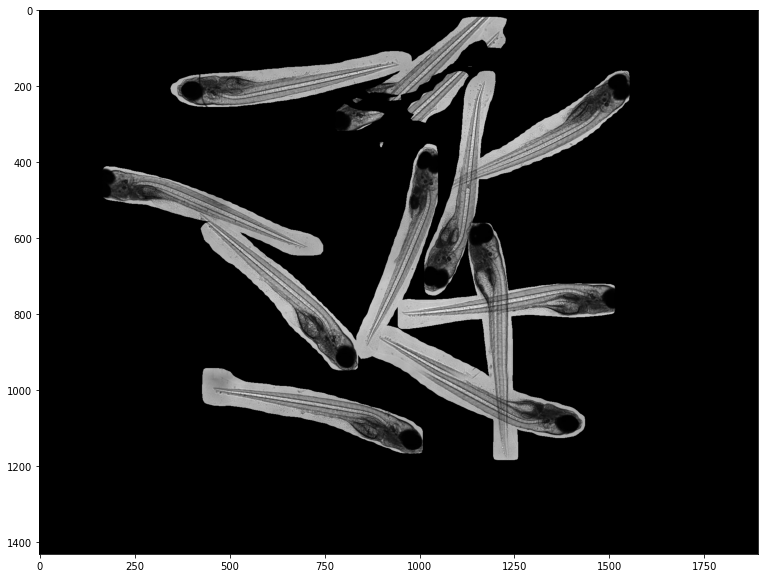

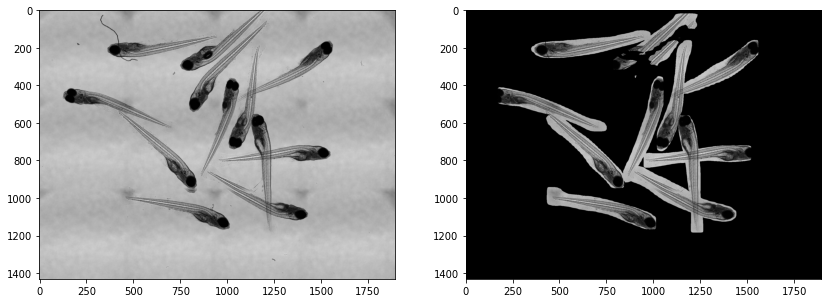

In [5]:
for image, prediction in zip(images, predictions):
    plot_prediction(image, prediction, cfg)
    plot_segementation(image, prediction)
    plot_segementation_vs_real(image, prediction)

## Learning curve

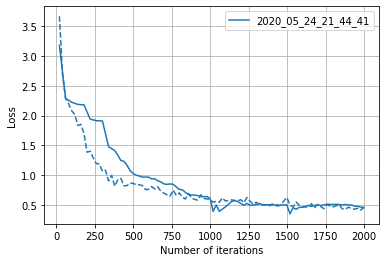

In [6]:
plot_train_vs_validation_loss([cfg.OUTPUT_DIR], show_training_loss=True)

## Compare to other models

In [7]:
bbox_df, segm_df = coco_evaluation_all_model("test")

[05/25 21:27:48 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/25 21:27:48 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_24_21_44_41/coco_instances_results.json
[05/25 21:27:48 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.768
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.975
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.933
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.908
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

In [8]:
bbox_df.head()

,model,AP,AP50,AP75,APs,APm,APl,AP-N,AP-NE,AP-E,AP-SE,AP-S,AP-SW,AP-W,AP-NW
0,output/2020_05_24_21_44_41,76.826626,97.524752,93.301361,NaN,90.816832,75.273436,77.298444,69.488449,81.347135,83.861386,86.415842,53.216054,85.460946,77.524752


In [9]:
segm_df.head()

,model,AP,AP50,AP75,APs,APm,APl,AP-N,AP-NE,AP-E,AP-SE,AP-S,AP-SW,AP-W,AP-NW
0,output/2020_05_24_21_44_41,68.556789,95.080446,82.287541,NaN,79.937058,68.015058,73.176803,66.30363,81.20372,66.039604,75.569307,42.146393,81.143564,62.871287
